# Assignment Sheet 5
## Done by Nayan Man Singh Pradhan

## Importing Libraries

In [1]:
## Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as linalg
from sklearn import linear_model
from matplotlib import cm

## Main Functions

In [2]:
## Functions

## Cholesky equation solver
def Cholesky_solver(M, b):
    c, low = linalg.cho_factor(M)
    return (linalg.cho_solve((c, low), b))

## For solving linear equation
def linear_eqn_solver(m, X, c):
    return (np.dot(X, m) + c)
    
## Main linear regression
def lin_reg(x, y, test):
    
    ## Build matrix X
    x = np.array(x)
    y = np.array(y)
    x_of1 = np.ones((x.shape[0], 1))
    X = np.hstack((x_of1, x))
    
    ## b <-- X.T y
    b = np.dot(X.T, y)
    
    ## A <-- X.T X
    A = np.dot(X.T, X)
    
    ## Solve AB = b using Cholesky factorization
    B_hat = Cholesky_solver(A, b)
    
    ## Predict
    lin_reg_pred = linear_eqn_solver(B_hat[1:], test, B_hat[0])
    
    return lin_reg_pred, B_hat

## For printing and testing purposes
def final_outcome(X, y, test):
    
    ## Predict using self implemented function
    predictor_function = lin_reg(X, y, test)
    print("Result from self implementation:")
    print("Prediction: ", predictor_function[0])
    print("Intercept: ", predictor_function[1][0])
    print("Coefficient: ", predictor_function[1][1:])

    print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

    ## Library to check implementation
    lin_reg_library = linear_model.LinearRegression()
    lin_reg_library.fit(X, y)
    lib_pred = lin_reg_library.predict(test)
    print("Result from library:")
    print("Prediction: ", lib_pred)
    print("Intercept: ", lin_reg_library.intercept_)
    print("Coefficient: ", lin_reg_library.coef_)

## Example 4.1

In [3]:
## Example 4.1

print("Example 4.1\n")
X = np.array([[1,0],[1,1],[2,1],[4,2]])
y = np.array([1,2,4,5])

test = np.array([[0,4]])

final_outcome(X,y,test)

Example 4.1

Result from self implementation:
Prediction:  [4.66666667]
Intercept:  0.6666666666666665
Coefficient:  [0.66666667 1.        ]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from library:
Prediction:  [4.66666667]
Intercept:  0.6666666666666674
Coefficient:  [0.66666667 1.        ]


## Example 4.2

Example 4.2

Result from self implementation:
Prediction:  [1.28]
Intercept:  -0.1300000000000005
Coefficient:  [0.47]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from library:
Prediction:  [1.28]
Intercept:  -0.13000000000000012
Coefficient:  [0.47]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x



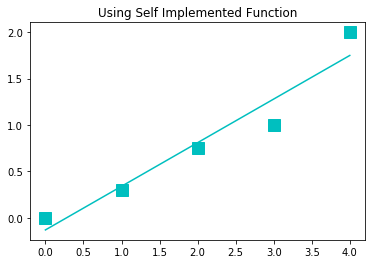


x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x



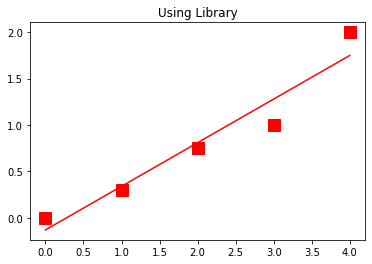

In [4]:
## Example 4.2

print("Example 4.2\n")
X = [[0], [1], [2], [3], [4]]
y = [0, 0.3, 0.75, 1, 2]

test = np.array([3])
test = test.reshape(-1, 1)

final_outcome(X,y,test)

## For Graphing -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

X_eval = np.linspace(0,4,1000)
X_eval = X_eval.reshape(-1,1)
plt.figure()

temp = []
for i in X_eval:
    temp.append(lin_reg(X, y, i)[0])
    
temp = np.asarray(temp)

plt.plot(X_eval, temp, color = 'c', label="linear regression predictor")
plt.plot(X,y, 'rs', color = 'c', markersize=12, label="trainin set")
plt.title("Using Self Implemented Function")
plt.show()

print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

lin_reg_library = linear_model.LinearRegression()
lin_reg_library.fit(X, y)

plt.figure()
plt.plot(X_eval,lin_reg_library.predict(X_eval), color = 'r', label="linear regression predictor")
plt.plot(X,y, 'rs', markersize=12, color = 'r', label="trainin set")
plt.title("Using Library")
plt.show()

## End Graphing -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

## Example 4.3

Example 4.3

Result from self implementation:
Prediction:  [-0.585  -0.6225  2.235   2.1975]
Intercept:  -0.12125000000000065
Coefficient:  [ 0.47    -0.00625]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from library:
Prediction:  [-0.585  -0.6225  2.235   2.1975]
Intercept:  -0.12125000000000008
Coefficient:  [ 0.47    -0.00625]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x



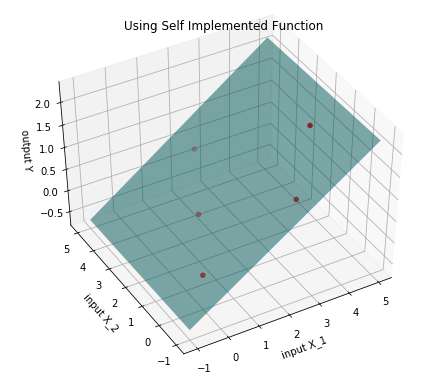


x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x



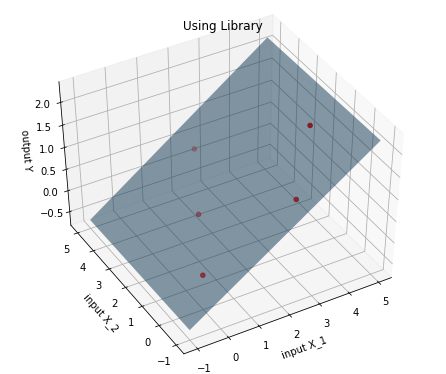

In [5]:
## Example 4.3

print("Example 4.3\n")
X = np.array([[0, 0], [1,2], [2,4], [3,0], [4,1]])
y = np.array([0, 0.3, 0.75, 1, 2])

test = (np.array([[-1, -1, 5, 5], [-1, 5, -1, 5]]).T)

final_outcome(X,y,test)

## For Graphing -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig, elev=45, azim=-120)
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='training set')
ax.plot_surface(np.array([[-1, -1], [5, 5]]), np.array([[-1, 5], [-1, 5]]), (lin_reg(X, y, test)[0]).reshape((2, 2)), color='c', alpha=.5, label='linear regression predictor')
ax.set_xlabel('input X_1')
ax.set_ylabel('input X_2')
ax.set_zlabel('output Y')
plt.title("Using Self Implemented Function")
plt.show()

print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

lin_reg_library = linear_model.LinearRegression()
lin_reg_library.fit(X, y)
fig = plt.figure(figsize=(6, 5))
ax = Axes3D(fig, elev=45, azim=-120)
ax.scatter(X[:, 0], X[:, 1], y, c='r', marker='o', label='training set')
ax.plot_surface(np.array([[-1, -1], [5, 5]]), np.array([[-1, 5], [-1, 5]]), lin_reg_library.predict(np.array([[-1, -1, 5, 5], [-1, 5, -1, 5]]).T).reshape((2, 2)), alpha=.5, label='linear regression predictor')
ax.set_xlabel('input X_1')
ax.set_ylabel('input X_2')
ax.set_zlabel('output Y')
plt.title("Using Library")
plt.show()

## End Graphing -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

## Energy Efficiency Data Set from UCI Machine Learning

In [6]:
## Energy Efficiency Data Set from UCI Machine Learning

print("Energy Efficiency Data Set from UCI Machine Learning\n")
df = pd.read_excel('ENB2012_data.xlsx')

## Predict the first three samples of the dataset

X = df.iloc[3:,:-2]
y = df.iloc[3:,-2:]
Actual_y = df.iloc[:3,-2:]

test = df.iloc[:3,:-2]

print("Actual Value\n", Actual_y)
print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

final_outcome(X,y,test)

Energy Efficiency Data Set from UCI Machine Learning

Actual Value
       Y1     Y2
0  15.55  21.33
1  15.55  21.33
2  15.55  21.33

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from self implementation:
Prediction:  [[23.08768982 26.1261021 ]
 [23.05256367 26.24017802]
 [23.01743753 26.35425394]]
Intercept:  [80.01217181 94.62606747]
Coefficient:  [[-6.13348059e+01 -6.85372408e+01]
 [ 3.95882445e-01  4.12711811e-01]
 [-4.18923397e-01 -4.54026442e-01]
 [-9.61655001e-01 -9.98844979e-01]
 [ 4.10832925e+00  4.24351217e+00]
 [-3.51261435e-02  1.14075922e-01]
 [ 1.96159053e+01  1.45097128e+01]
 [ 1.75262028e-01  2.20352656e-02]]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from library:
Prediction:  [[23.08768982 26.1261021 ]
 [23.05256367 26.24017802]
 [23.01743753 26.35425394]]
Intercept:  [80.01217181 94.62606746]
Coefficient:  [[-6.13348059e+01 -6.04701956e-02  3.74292432e-02 -4.89497194e-02
   4.10832925e+00 -3.51261435e-02  1.96159053e+01  1.75262028

## Example 4.4

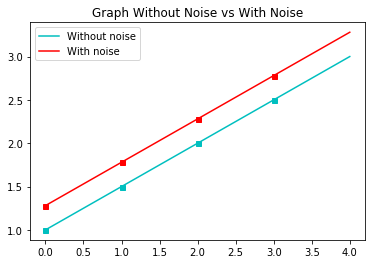

In [7]:
## Example 4.4
X = np.array([[0],[1],[2],[3]])
gaussian_noise = np.random.normal(0,np.std(X),1)
solved_no_noise = linear_eqn_solver(0.5, X, 1)
solved_with_noise = linear_eqn_solver(0.5, X, 1+gaussian_noise)

## For Graphing -x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

X_eval = np.linspace(0,4,1000)
X_eval = X_eval.reshape(-1,1)
plt.figure()

temp_no_noise = []
temp_with_noise = []

for i in X_eval:
    temp_no_noise.append(lin_reg(X, solved_no_noise, i)[0])
    temp_with_noise.append(lin_reg(X, solved_with_noise, i)[0])
    
temp_no_noise = np.asarray(temp_no_noise)
temp_with_noise = np.asarray(temp_with_noise)

plt.plot(X_eval, temp_no_noise, color='c', label="Without noise")
plt.plot(X,solved_no_noise, 'rs', color = 'c', markersize=5)

plt.plot(X_eval, temp_with_noise, color='r', label="With noise")
plt.plot(X,solved_with_noise, 'rs', color = 'r', markersize=5)

plt.title("Graph Without Noise vs With Noise")
plt.legend()
plt.show()

## Example 4.5

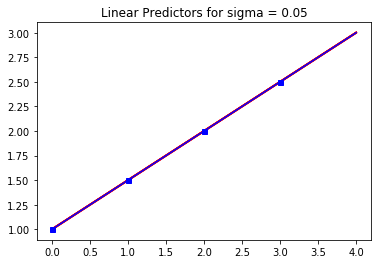

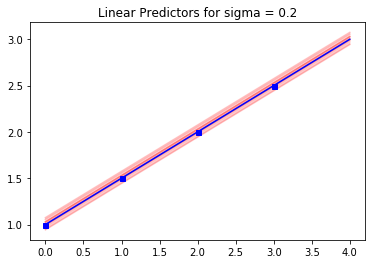

In [8]:
## Example 4.5

X = np.array([[0],[1],[2],[3]])
solved_no_noise = linear_eqn_solver(0.5, X, 1)

X_eval = np.linspace(0,4,1000)
X_eval = X_eval.reshape(-1,1)
plt.figure()

temp_no_noise = []

for i in X_eval:
    temp_no_noise.append(lin_reg(X, solved_no_noise, i)[0])
    
temp_no_noise = np.asarray(temp_no_noise)

## For sigma = 0.05
for j in range(0,20):

    gaussian_noise_1 = np.random.normal(0,(0.05**2),1)
    solved_with_noise_1 = linear_eqn_solver(0.5, X, 1+gaussian_noise_1)

    temp_with_noise_1 = []
    for i in X_eval:
        temp_with_noise_1.append(lin_reg(X, solved_with_noise_1, i)[0])
    
    temp_with_noise_1 = np.asarray(temp_with_noise_1)

    plt.plot(X_eval, temp_with_noise_1, color='r', alpha=0.5)
    plt.plot(X,solved_with_noise_1, 'rs', color = 'r', markersize=0)

plt.plot(X_eval, temp_no_noise, color='b', alpha=1, label="Without noise")
plt.plot(X,solved_no_noise, 'rs', color = 'b', markersize=5)

plt.title("Linear Predictors for sigma = 0.05")
plt.show()

## For sigma = 0.2
for j in range(0,20):

    gaussian_noise_2 = np.random.normal(0,(0.2**2),1)
    solved_with_noise_2 = linear_eqn_solver(0.5, X, 1+gaussian_noise_2)

    temp_with_noise_2 = []
    for i in X_eval:
        temp_with_noise_2.append(lin_reg(X, solved_with_noise_2, i)[0])
    
    temp_with_noise_2 = np.asarray(temp_with_noise_2)

    plt.plot(X_eval, temp_with_noise_2, color='r', alpha=0.15)
    plt.plot(X,solved_with_noise_2, 'rs', color = 'r', markersize=0)

plt.plot(X_eval, temp_no_noise, color='b', alpha=1, label="Without noise")
plt.plot(X,solved_no_noise, 'rs', color = 'b', markersize=5)

plt.title("Linear Predictors for sigma = 0.2")
plt.show()

## Exercise 2 (Theory Solution Check)

In [14]:
## Exercise 2 (Theory Solution Check)

print("Exercise 2 (Theory Solution Check)\n")
print("Answer from Theory: 2.55")

print("\nx-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x\n")

X = np.array([(1,1), (1,2), (2,2), (2,4)])
y = [2, 3, 3, 4]

test = np.array([(1.5,1.5)])

final_outcome(X,y,test)

Exercise 2 (Theory Solution Check)

Answer from Theory: 2.55

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from self implementation:
Prediction:  [2.55]
Intercept:  1.5
Coefficient:  [0.1 0.6]

x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Result from library:
Prediction:  [2.55]
Intercept:  1.5
Coefficient:  [0.1 0.6]
